In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss,CondensedNearestNeighbour
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix, ConfusionMatrixDisplay
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv('telco_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Churn'])
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)
train_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4950-BDEUX,Male,0,No,No,35,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,49.20,1701.65,No
1,7993-NQLJE,Male,0,Yes,Yes,15,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,75.10,1151.55,No
2,7321-ZNSLA,Male,0,Yes,Yes,13,No,No phone service,DSL,Yes,...,No,Yes,No,No,Two year,No,Mailed check,40.55,590.35,No
3,4922-CVPDX,Female,0,Yes,No,26,Yes,No,DSL,No,...,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),73.50,1905.7,No
4,2903-YYTBW,Male,0,Yes,Yes,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,44.55,44.55,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,6308-CQRBU,Female,0,Yes,No,71,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,No,Electronic check,109.25,7707.7,No
5630,2842-JTCCU,Male,0,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),46.05,80.35,Yes
5631,6402-ZFPPI,Female,1,No,No,25,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,102.80,2660.2,Yes
5632,3594-BDSOA,Female,0,Yes,No,24,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.40,482.8,No


In [4]:
df = pd.read_csv('telco_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
display(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


None

# Data Cleaning:

### Converting 'TotalCharges' column to numeric

In [6]:
train_df['TotalCharges'] = pd.to_numeric(train_df['TotalCharges'], errors='coerce')

### Check and handling missing values

In [7]:
train_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64

*8 Null values in 'TotalCharges' column*

*Fill with Mean value*

In [8]:
train_df['TotalCharges'].fillna((train_df['TotalCharges'].mean()), inplace=True)

### Check for duplicates

In [9]:
train_df.duplicated().sum()

0

*No duplicates*

# Exploratory Data Analysis:

### Distribution of target column

Churn
No     4139
Yes    1495
Name: count, dtype: int64


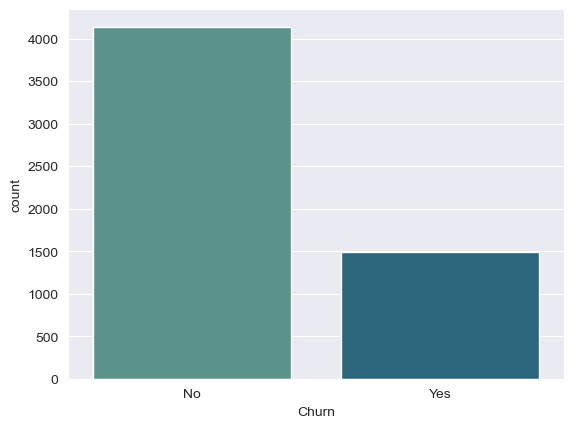

In [10]:
print(train_df['Churn'].value_counts())
_ = sns.countplot(x='Churn', data=train_df, palette='crest')

*The dataset exhibits a skewed distribution for the binary target variable, which requires careful consideration in subsequent modeling stages.*

### Categorical features count plot

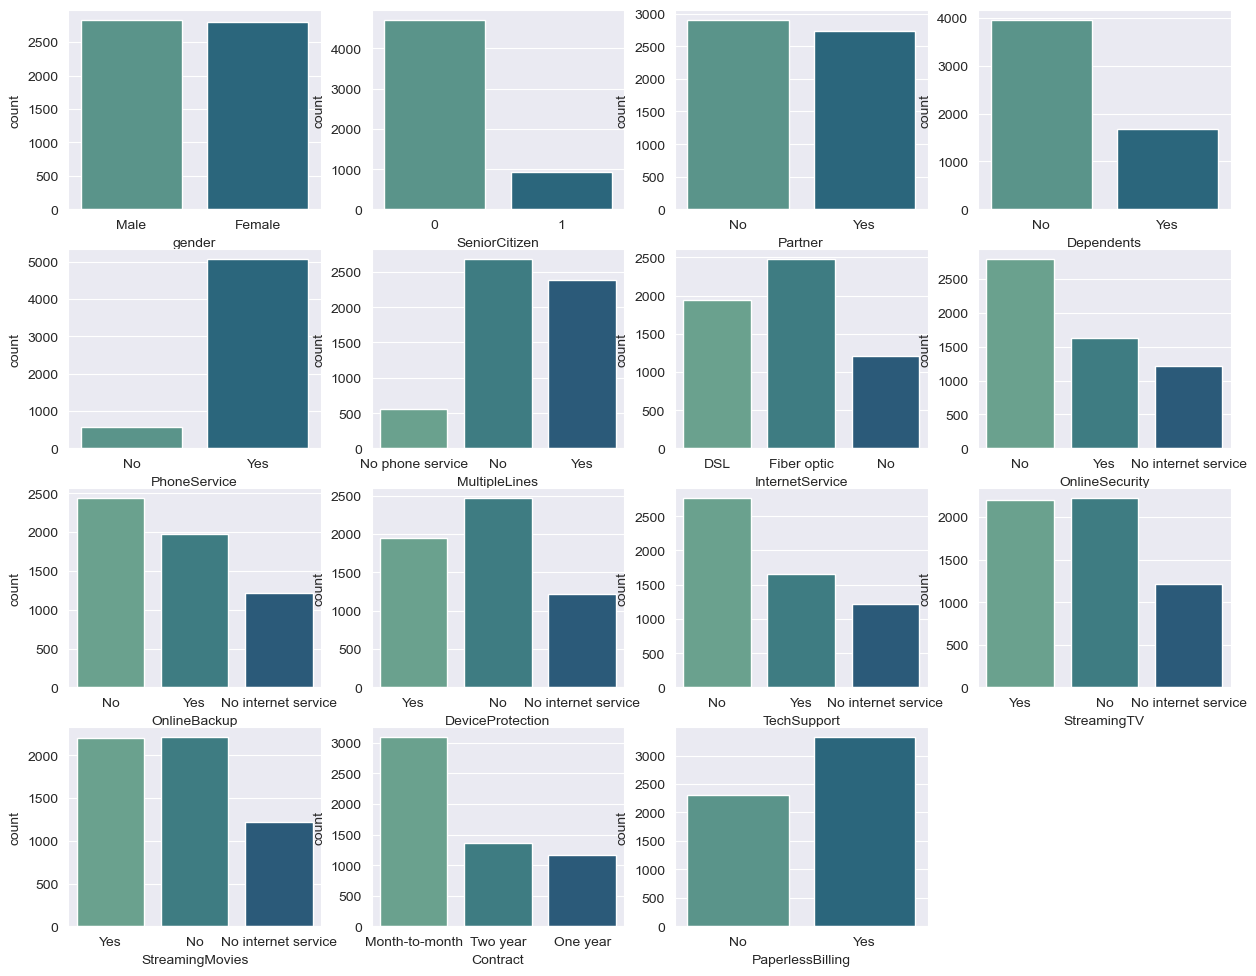

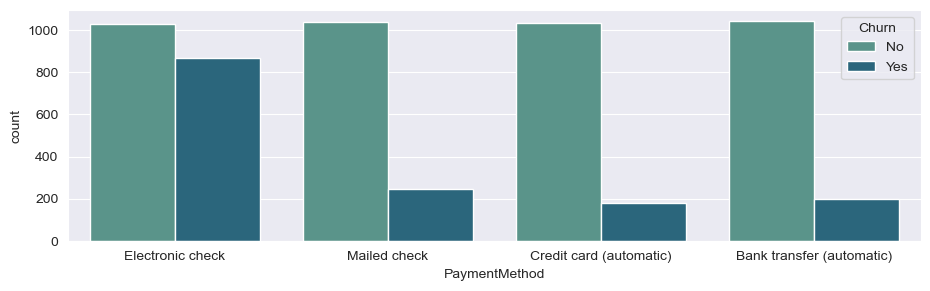

<Figure size 640x480 with 0 Axes>

In [11]:
cat_cols = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService',
              'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
              'Contract', 'PaperlessBilling']

plt.figure(figsize=(15, 15))
for n, variable in enumerate(cat_cols):
    ax = plt.subplot(5, 4, n + 1)
    g=sns.countplot(data=train_df, x=train_df[variable], ax=ax, palette='crest')
plt.show() 
plt.figure(figsize=(11,3))
_ = sns.countplot(x= 'PaymentMethod', hue='Churn', data=train_df, palette='crest')
plt.show() 
plt.tight_layout()

*Gender Distribution: The gender distribution within the dataset is well-balanced, with a nearly equal number of male and female customers.*

*Feature Consolidation: For certain categorical features, such as Online Security and Tech Support, the labels 'No' and 'No internet service' are semantically equivalent. These were consolidated into a single 'No' category to improve feature consistency and reduce redundancy.*

### Distribution of Continuous Features

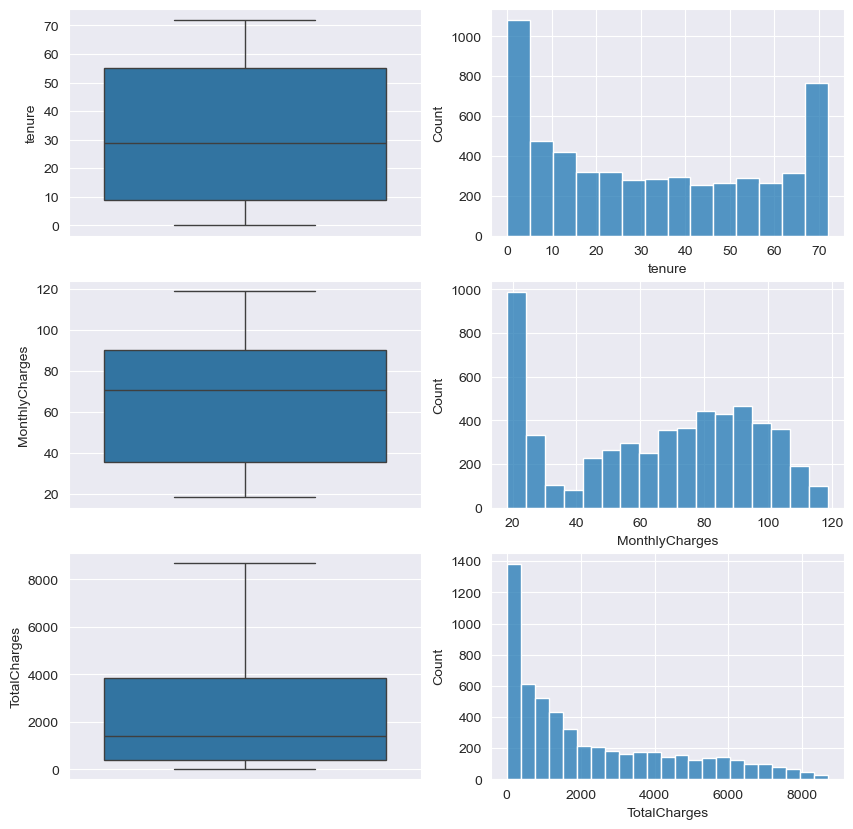

In [12]:
plt.figure(figsize=(10,10))
plt.subplot(3, 2, 1)
_ = sns.boxplot(y= train_df['tenure'])
plt.subplot(3, 2, 2)
_ = sns.histplot(x='tenure', data=train_df)

plt.subplot(3, 2, 3)
_ = sns.boxplot(y= train_df['MonthlyCharges'])
plt.subplot(3, 2, 4)
_ = sns.histplot(x='MonthlyCharges', data=train_df)

plt.subplot(3, 2, 5)
_ = sns.boxplot(y= train_df['TotalCharges'])
plt.subplot(3, 2, 6)
_ = sns.histplot(x='TotalCharges', data=train_df)

*All continuous features appear free of outliers according to their boxplot visualizations.*

*The histogram for the 'TotalCharges' feature reveals a right-skewed distribution, indicating that a majority of customers have lower total charges, with a long tail of fewer customers having higher charges.*

### Correlation of Monthly vs. Total Charges

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

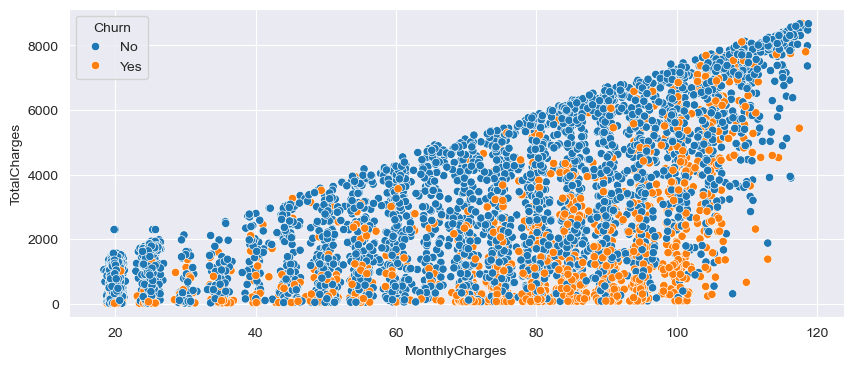

In [13]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=train_df, x='MonthlyCharges', y='TotalCharges', hue='Churn')

*There is a direct relationship observed where total charges increase in tandem with monthly charges.*

*Customers with higher monthly charges exhibit a greater likelihood of churning.*

## Consolidating Redundant Feature Labels

In [14]:
train_df.replace(['No internet service','No phone service'], 'No', inplace=True)

## Converting Categorical Variables to a Numerical Format

In [15]:
# Feature Binarization Using One-Hot Encoding
cat_cols = ['gender','Contract','InternetService','PaymentMethod','Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'MultipleLines', 'OnlineSecurity', 
          'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

train_df = pd.concat([train_df, pd.get_dummies(train_df[cat_cols])], axis='columns')
train_df = train_df.drop(columns=cat_cols)

# Label Encoding the Target Variable
train_df['Churn'] = np.where(train_df['Churn'] == 'Yes', 1, 0)  # yes=1, No=0

# Feature Engineering

### Discretizing the 'tenure' Feature

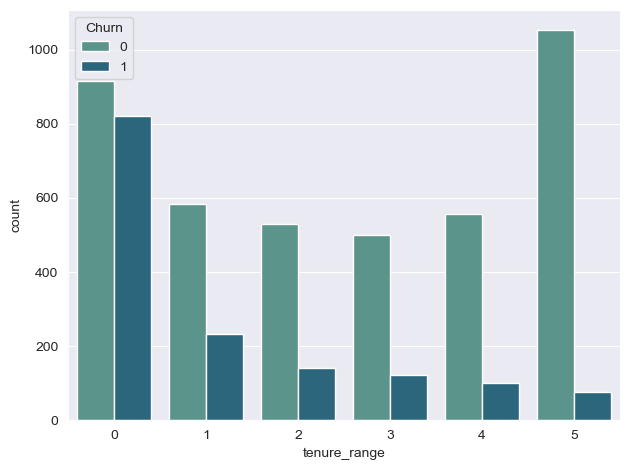

In [16]:
condition = [((train_df.tenure >= 0)&(train_df.tenure <= 12)), ((train_df.tenure > 12)&(train_df.tenure <= 24)), 
             ((train_df.tenure > 24)&(train_df.tenure <= 36)),((train_df.tenure > 36)&(train_df.tenure <= 48)),
             ((train_df.tenure > 48)&(train_df.tenure <= 60)), (train_df.tenure > 60)]

#choice = ['0-1year','1-2years', '2-3years', '3-4years','4-5years','more than 5 years']
choice = [0,1, 2, 3, 4, 5]
train_df['tenure_range'] = np.select(condition, choice)
_ = sns.countplot(x= 'tenure_range', hue='Churn', data=train_df, palette='crest', order=choice)
plt.tight_layout()

*Customer tenure is a strong indicator of loyalty; the churn rate decreases significantly as tenure increases, with very few customers leaving after four years.
Conversely, the initial year of service is a critical period, exhibiting the highest rate of customer attrition.*

## Data Transformation and Scaling:

*Addressing Data Skewness via Log Transform*

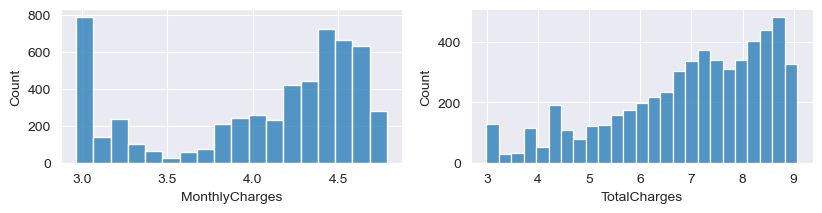

In [17]:
train_df['MonthlyCharges']=np.log1p(train_df['MonthlyCharges'])
train_df['TotalCharges']=np.log1p(train_df['TotalCharges'])
plt.figure(figsize=(15,2))
plt.subplot(1, 3, 2)
_ = sns.histplot(x='MonthlyCharges', data=train_df)

plt.subplot(1, 3, 3)
_ = sns.histplot(x='TotalCharges', data=train_df)

### Balancing the Class Distribution:

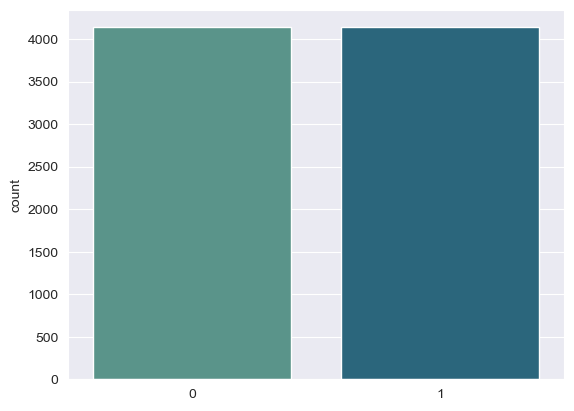

In [20]:
X_train = train_df.drop(columns=['customerID','Churn'])
y_train = train_df['Churn']
sm = SMOTE(random_state = 0, sampling_strategy = 'minority', k_neighbors= 5)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())
_ = sns.countplot(x=y_train, palette='crest')

## Applying Preprocessing Pipeline to the Test Set

*A function was defined to apply the entire preprocessing workflow to the test set, maintaining consistency with the training data.*

In [21]:
def test_prep (test_df):
    #Data cleaning

    #Converting 'TotalCharges' column to numeric
    test_df['TotalCharges'] = pd.to_numeric(test_df['TotalCharges'], errors='coerce')
    
    #Replacing 'No internet service' and 'No phone service' with 'No'
    test_df.replace(['No internet service','No phone service'], 'No', inplace=True)
    
    #To prevent data leakage, missing values in numerical features are filled with the mean calculated solely from the training data.
    for col in test_df.columns:
        if test_df[col].isna().sum() > 0:
            test_df[col] = test_df[col].fillna(train_df[col].map(np.mean))
            
    #Categorical features encoding 
    test_df = pd.concat([test_df, pd.get_dummies(test_df[cat_cols])], axis='columns')
    test_df = test_df.drop(columns=cat_cols)
    
    test_df['Churn'] = np.where(test_df['Churn'] == 'Yes', 1, 0)
            
    #Feature engineering
    #Binning 'tenure' feature into 6 ranges
    condition = [((test_df.tenure >= 0)&(test_df.tenure <= 12)), ((test_df.tenure > 12)&(test_df.tenure <= 24)), 
                 ((test_df.tenure > 24)&(test_df.tenure <= 36)),((test_df.tenure > 36)&(test_df.tenure <= 48)),
                 ((test_df.tenure > 48)&(test_df.tenure <= 60)), (test_df.tenure > 60)]
    #choice = ['0-1year','1-2years', '2-3years', '3-4years','4-5years','more than 5 years']
    choice = [0,1, 2, 3, 4, 5]
    test_df['tenure_range'] = np.select(condition, choice)
    #Feature Scaling
    test_df['MonthlyCharges']=np.log1p(test_df['MonthlyCharges'])
    test_df['TotalCharges']=np.log1p(test_df['TotalCharges'])
    return test_df

In [22]:
test_df = test_prep(test_df)
test_df

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Contract_Month-to-month,Contract_One year,...,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure_range
0,4376-KFVRS,0,72,4.745367,9.044191,0,False,True,False,False,...,True,False,True,False,True,False,True,False,True,5
1,2754-SDJRD,1,8,4.616605,6.812950,0,True,False,True,False,...,False,True,False,False,True,False,True,False,True,0
2,9917-KWRBE,0,41,4.373868,8.074711,0,True,False,False,True,...,True,False,True,True,False,False,True,True,False,3
3,0365-GXEZS,0,18,4.371976,7.292848,0,False,True,True,False,...,False,False,True,False,True,True,False,True,False,1
4,9385-NXKDA,0,72,4.426641,8.686151,0,True,False,False,False,...,True,False,True,True,False,False,True,False,True,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,5204-HMGYF,0,49,4.479607,8.377011,0,True,False,False,True,...,True,False,True,False,True,False,True,False,True,4
1405,9950-MTGYX,0,28,3.058707,6.192260,0,False,True,False,False,...,False,True,False,True,False,True,False,True,False,2
1406,3675-EQOZA,0,5,3.075005,4.549129,0,False,True,True,False,...,False,True,False,True,False,True,False,True,False,0
1407,3646-ITDGM,0,56,3.030134,6.959304,0,True,False,False,False,...,False,True,False,True,False,True,False,True,False,4


In [23]:
X_test = test_df.drop(columns=['customerID','Churn'])
y_test = test_df['Churn']

# Model training

*To identify the most effective algorithm, a variety of models were trained on the dataset for a side-by-side performance comparison*

### 1. Logistic Regression

In [24]:
model_logReg = LogisticRegression(C=200, max_iter=1000)

scores = cross_val_score(model_logReg, X_train, y_train, cv=10, scoring="f1")
print(scores)
model_logReg.fit(X_train, y_train)

[0.66079295 0.64767616 0.64133739 0.78272605 0.9433526  0.93103448
 0.93636364 0.92045455 0.92588369 0.92970522]


LogisticRegression(C=200, max_iter=1000)

#### Testing the model

In [25]:
log_pred = model_logReg.predict(X_test)

#### Confusion matrix

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

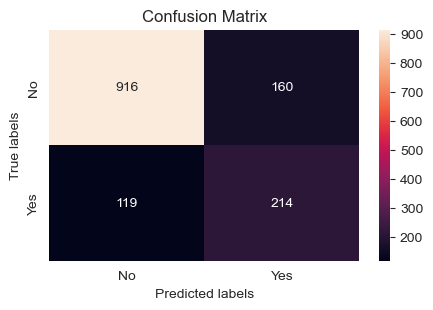

In [27]:
cm = confusion_matrix(log_pred, y_test)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes']) ; ax.yaxis.set_ticklabels(['No', 'Yes'])

#### Classification report

In [28]:
print(classification_report(y_test, log_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.85      0.89      0.87      1035
         Yes       0.64      0.57      0.61       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409



### 2. SVM model

In [29]:
model_svm = SVC(kernel='linear', C=20)
scores = cross_val_score(model_logReg, X_train, y_train, cv=10, scoring="f1")
print(scores)
model_svm.fit(X_train, y_train)

[0.66079295 0.64767616 0.64133739 0.78272605 0.9433526  0.93103448
 0.93636364 0.92045455 0.92588369 0.92970522]


SVC(C=20, kernel='linear')

#### Testing the model

In [30]:
svm_pred = model_svm.predict(X_test)

#### Confusion matrix

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

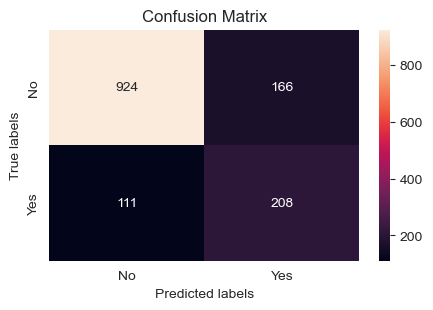

In [32]:
cm = confusion_matrix(svm_pred, y_test)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes']) ; ax.yaxis.set_ticklabels(['No', 'Yes'])

#### Classification report

In [33]:
print(classification_report(y_test, svm_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.85      0.89      0.87      1035
         Yes       0.65      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409



### 3. XGBoost model

In [35]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [1.5, 2, 5, 7],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [ 4, 5, 8]
        }

model_xgb = xgb.XGBClassifier(learning_rate= 0.08, n_estimators=100, objective='binary:logistic', silent=True, verbose=-1)

skf = StratifiedKFold(n_splits= 5, shuffle = True, random_state = 0)
random_search = RandomizedSearchCV(model_xgb, param_distributions=params, n_iter=5, scoring='roc_auc', 
                                   n_jobs=2,cv=skf.split(X_train, y_train), verbose=0, random_state=0)

_= random_search.fit(X_train, y_train)
print(random_search.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.08, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


#### Testing the model

In [36]:
xgb_pred = random_search.predict(X_test)

#### Confusion matrix

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

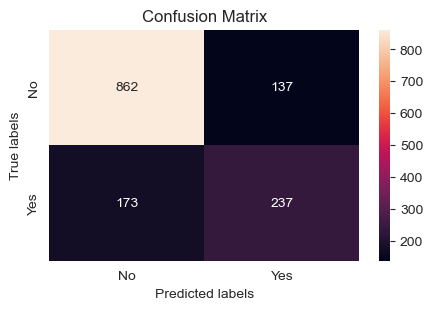

In [37]:
cm = confusion_matrix(xgb_pred, y_test)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes']) ; ax.yaxis.set_ticklabels(['No', 'Yes'])

#### Classification report

In [42]:
print(classification_report(y_test, xgb_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.86      0.83      0.85      1035
         Yes       0.58      0.63      0.60       374

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.73      1409
weighted avg       0.79      0.78      0.78      1409



### 4. MLP model

In [38]:
model_mlp= MLPClassifier(random_state=1, max_iter=500)
scores = cross_val_score(model_mlp, X_train, y_train, cv=10, scoring="f1")
print(scores)

model_mlp.fit(X_train, y_train)

[0.65486726 0.70355731 0.69637883 0.77792378 0.921875   0.92970522
 0.93970421 0.88482239 0.93764434 0.91009989]


MLPClassifier(max_iter=500, random_state=1)

#### Testing the model

In [39]:
mlp_pred = model_mlp.predict(X_test)

#### Confusion matrix

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

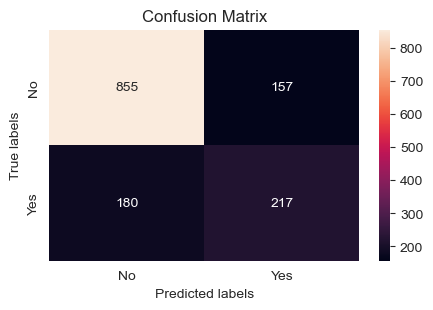

In [40]:
cm = confusion_matrix(mlp_pred, y_test)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes']) ; ax.yaxis.set_ticklabels(['No', 'Yes'])

#### Classification report

In [41]:
print(classification_report(mlp_pred,y_test, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.83      0.84      0.84      1012
         Yes       0.58      0.55      0.56       397

    accuracy                           0.76      1409
   macro avg       0.70      0.70      0.70      1409
weighted avg       0.76      0.76      0.76      1409

